## Linear Regression

In this notebook we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting data points on 2-D graph to find any relationship between the data

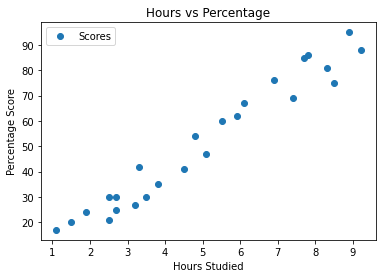

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Hence, we see that there is a positive linear relation between the number of hours studied and percentage of score. 

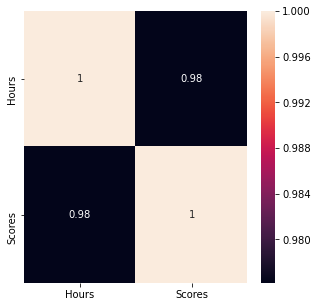

In [5]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = s_data.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### **Preparing the data**

Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

## Spliting this data into training and test sets

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


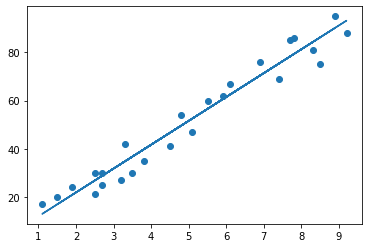

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


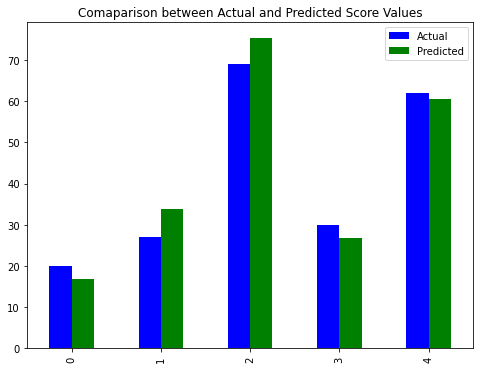

In [12]:
df.plot(kind='bar',figsize=(8,6), color=["B", "G"], title= "Comaparison between Actual and Predicted Score Values")

In [13]:
# Testing on our required data
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


### **Evaluating the model**


In [14]:

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 4.183859899002975
RMSE: 4.647447612100367
R-Square: 0.9454906892105355


### The accuracy of the model is 94.55%. The mean absolute error is 4.18%.

In [15]:
User_input = float(input())
print('Hours: {}'.format(User_input))
print('Predicted Score{}'.format(regressor.predict([[User_input]])))

9.25
Hours: 9.25
Predicted Score[93.69173249]


In [16]:
import pickle
pickle_out = open('regressor.pickle', 'wb')
pickle.dump(regressor, pickle_out)
pickle_out.close()